# Create heatmap from saved radial averages

In [1]:
# %pylab qt


### Imports and utility functions

In [2]:
from src.heatmap_utils import *
import src.heatmap_utils as heatmap_utils

In [14]:
load_from_path = 'intermediate_data/'

file_name = '266nm3.hdf5' 

fragment_list = ['C5H4N','I+','H+','C+','H2O+','I6+','C2Hn+','I4+','C3Hn+','I3+','I2+all','I2+highE']

fragment_list, uni_delay, uni_list_of_lists = load_radial_data(file_name, load_from_path, fragment_list)

number of runs: 21
number of unqique delays: 20


### simple plots

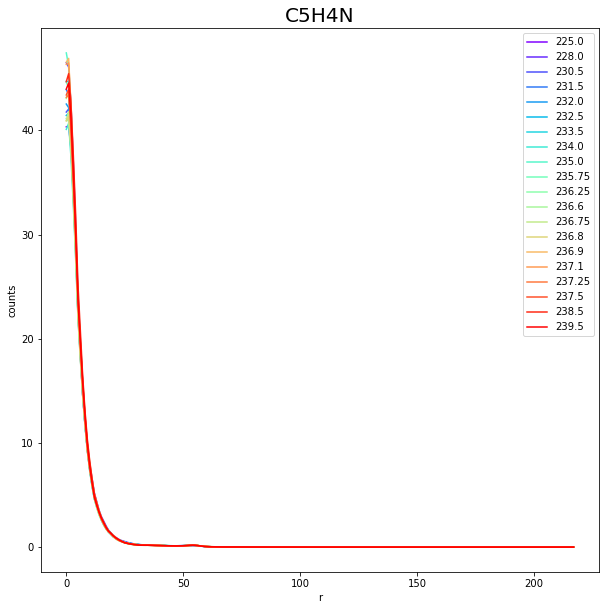

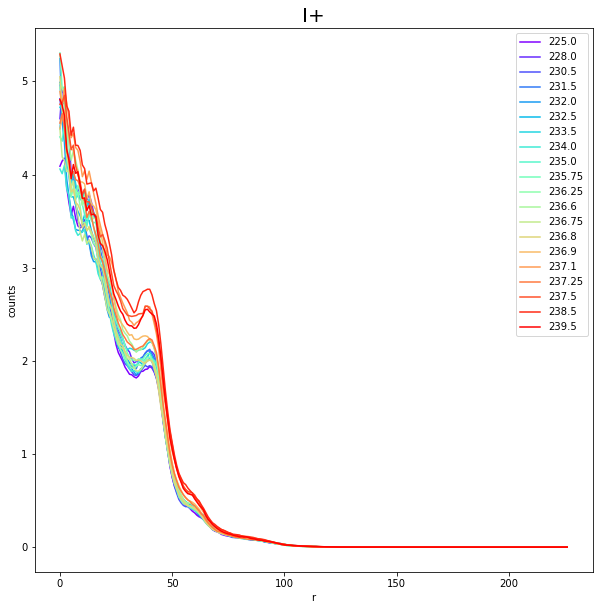

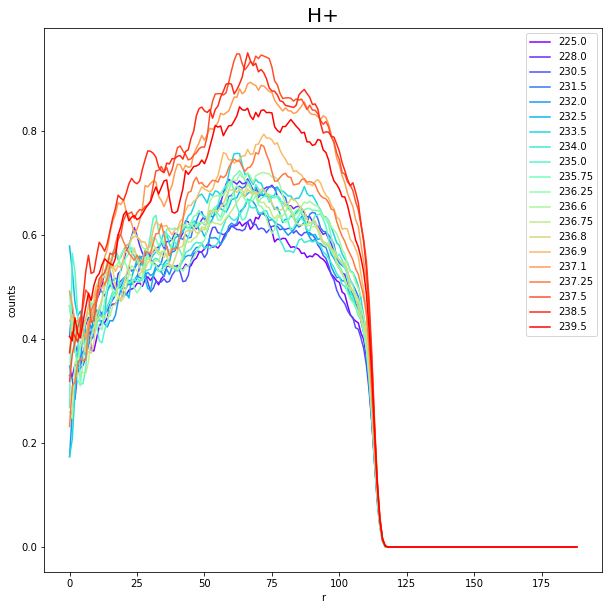

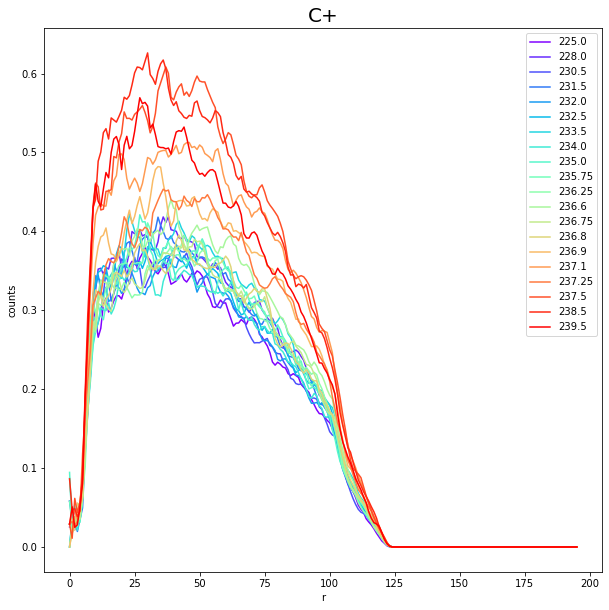

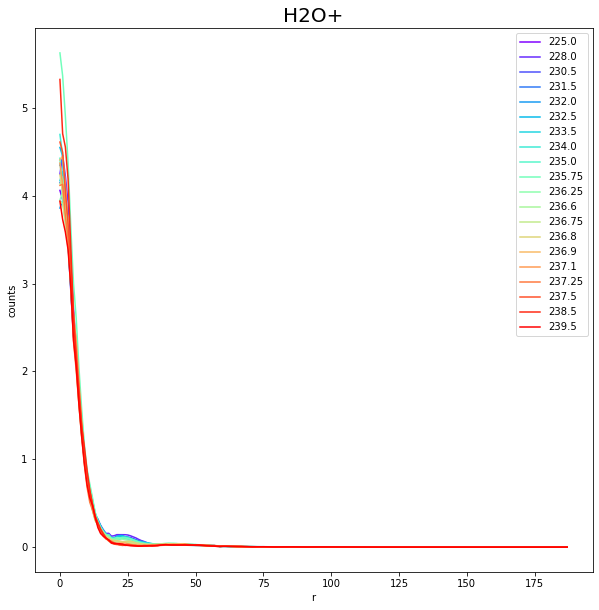

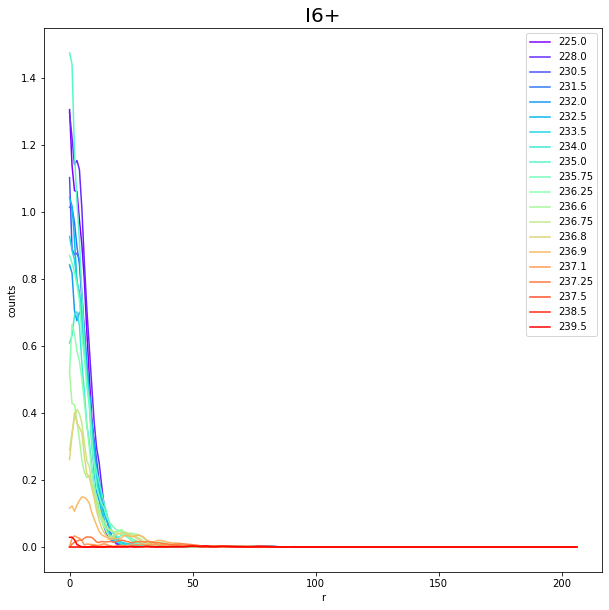

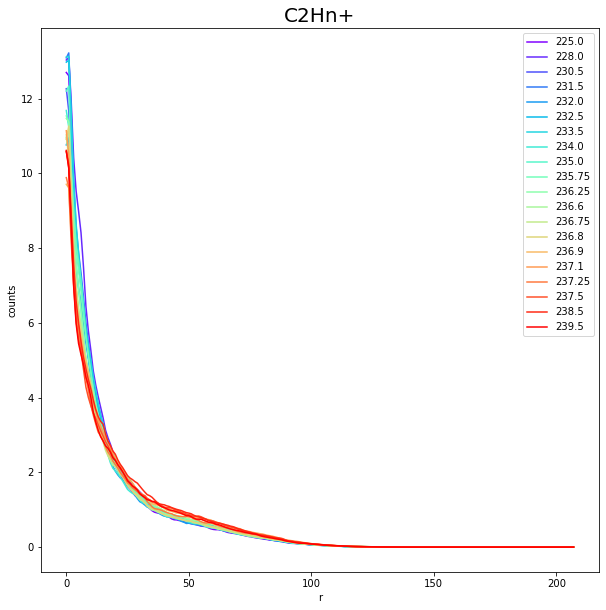

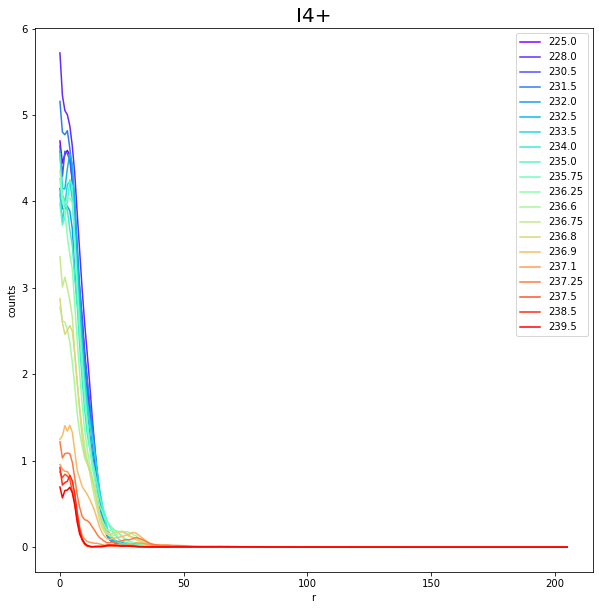

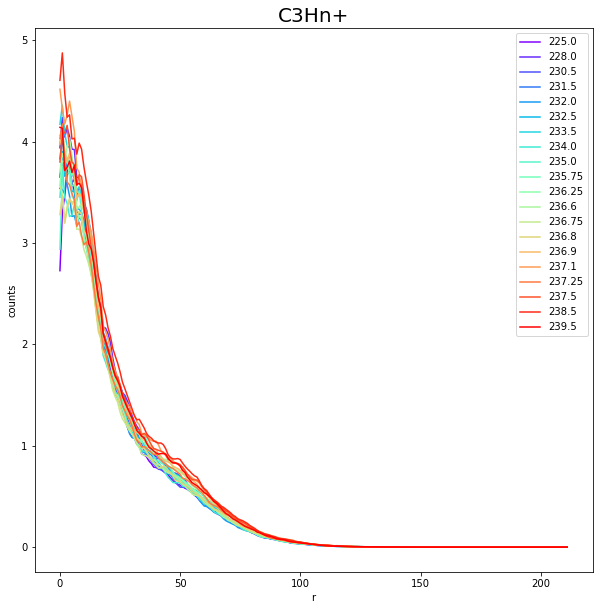

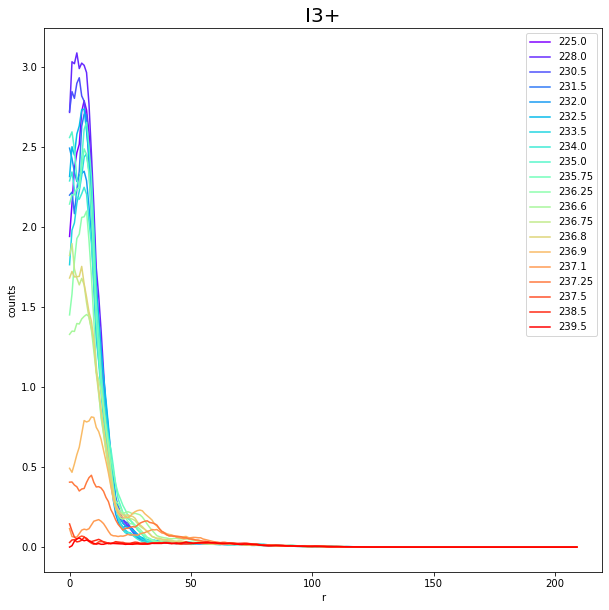

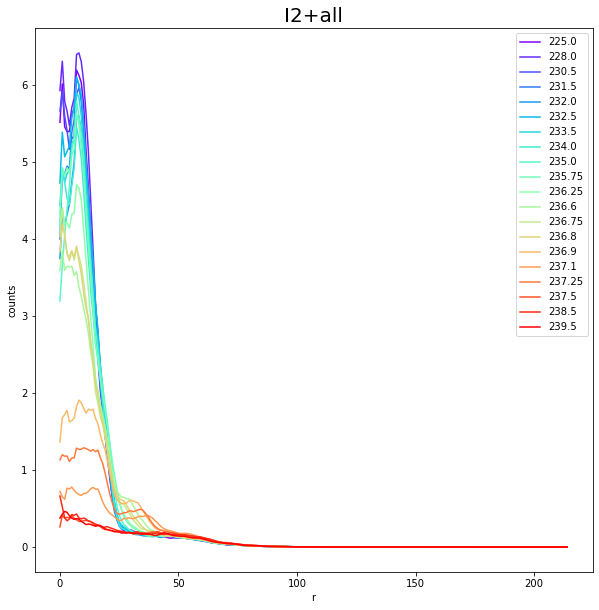

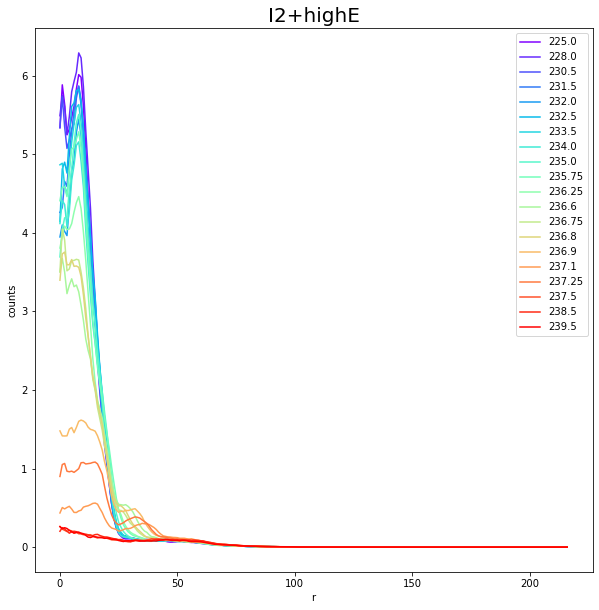

In [15]:
simple_plots(fragment_list, uni_delay, uni_list_of_lists)

### heatmap

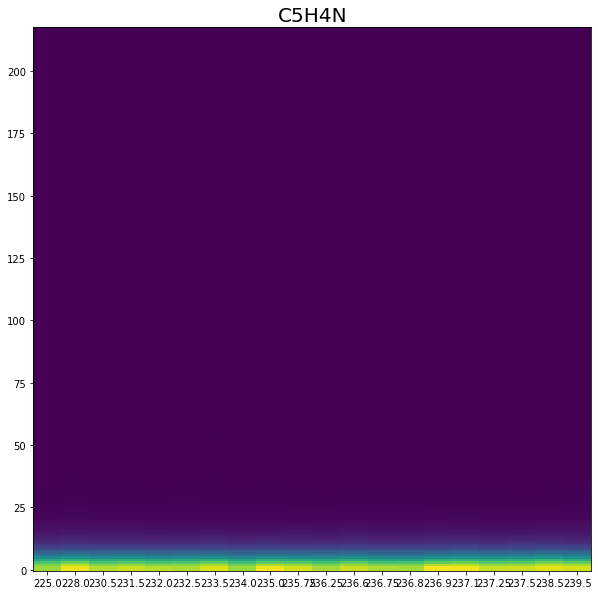

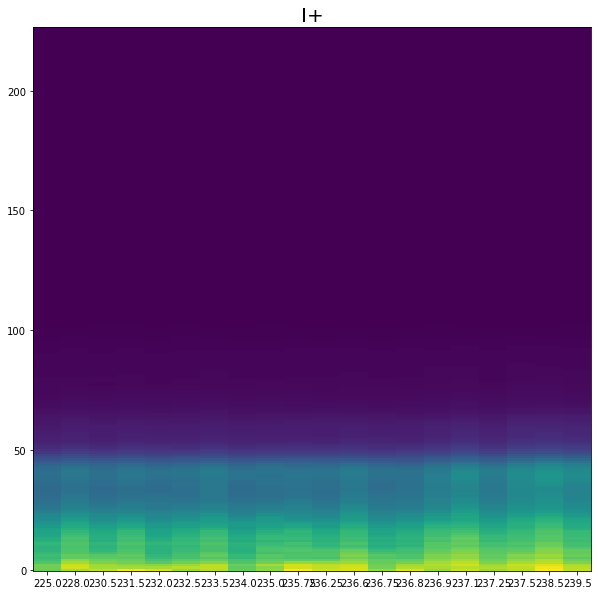

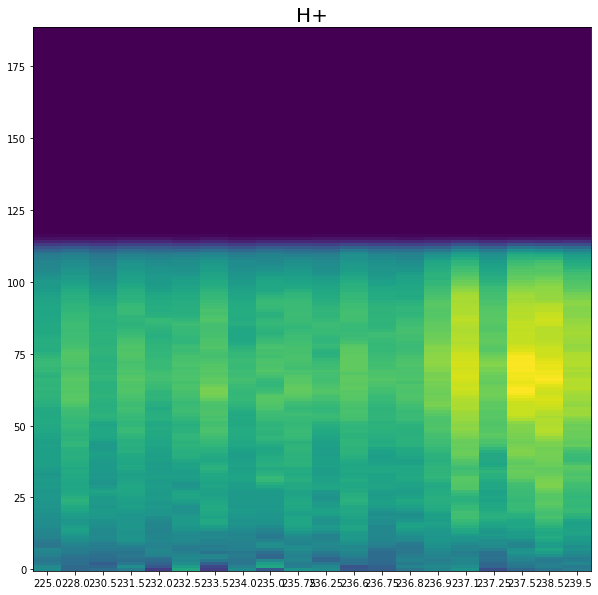

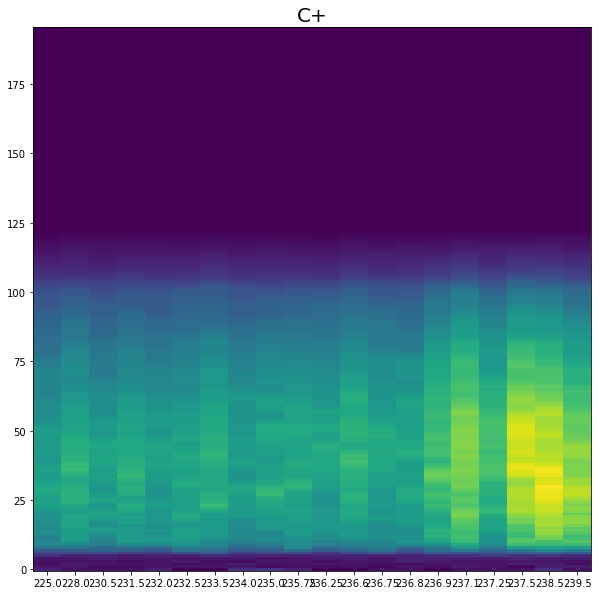

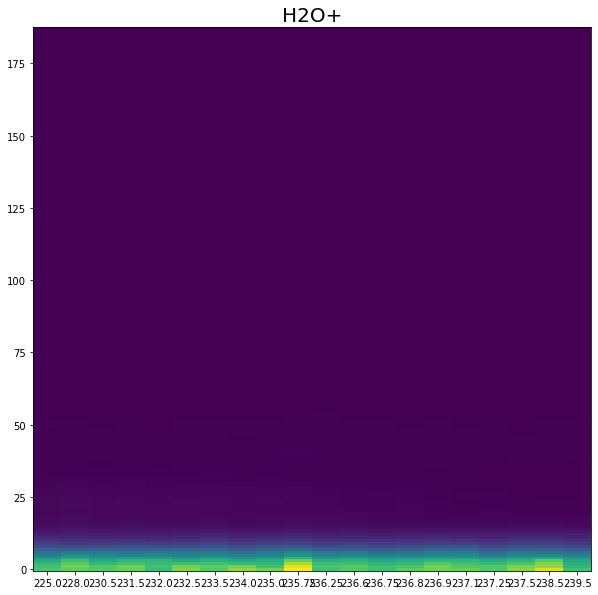

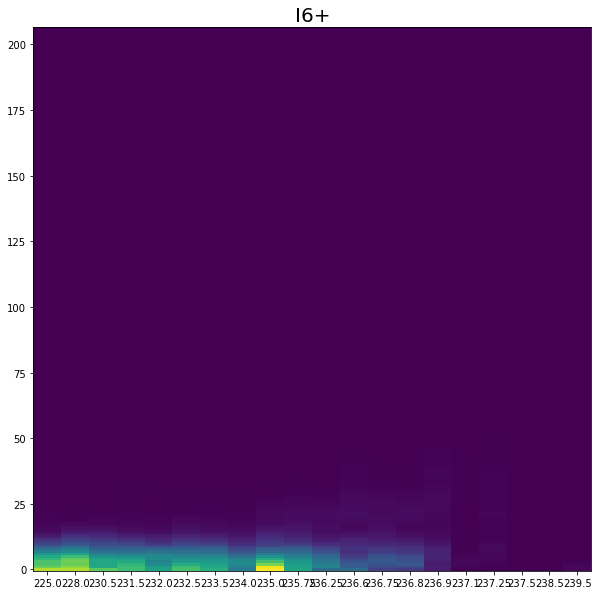

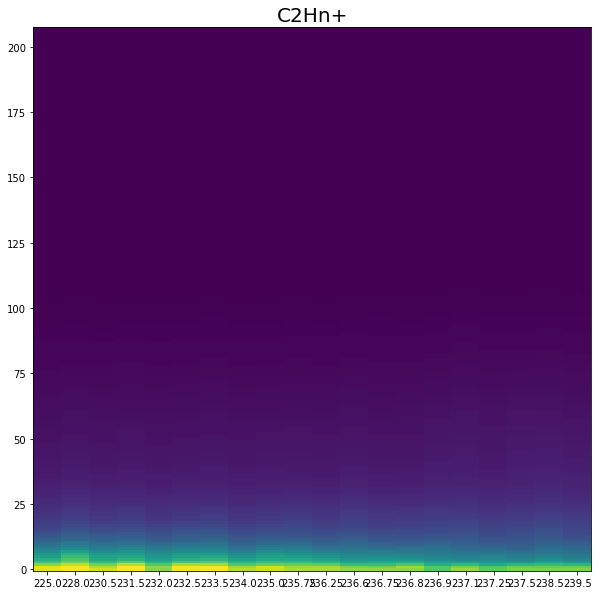

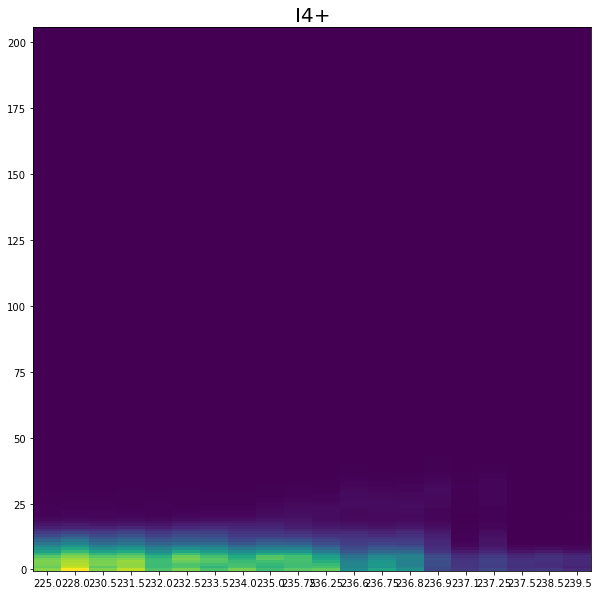

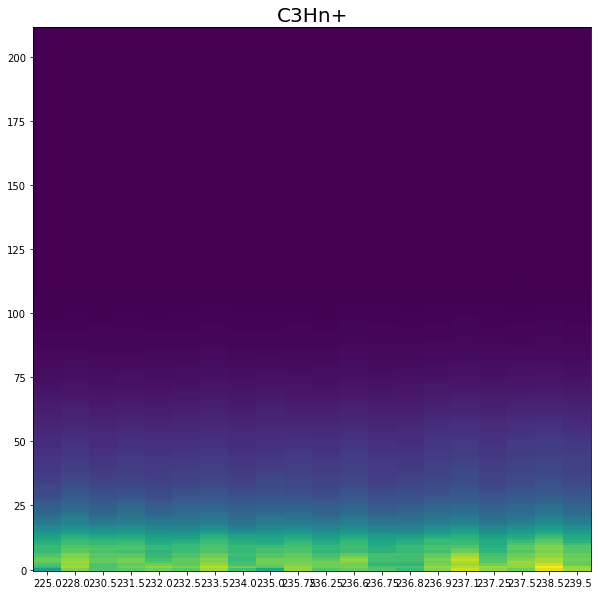

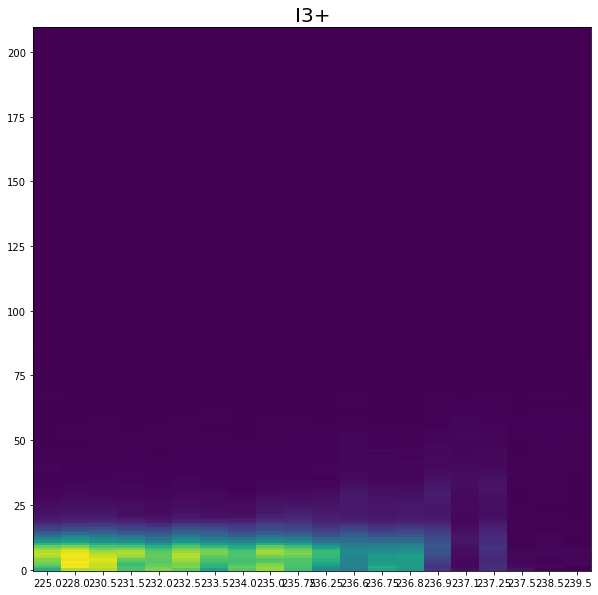

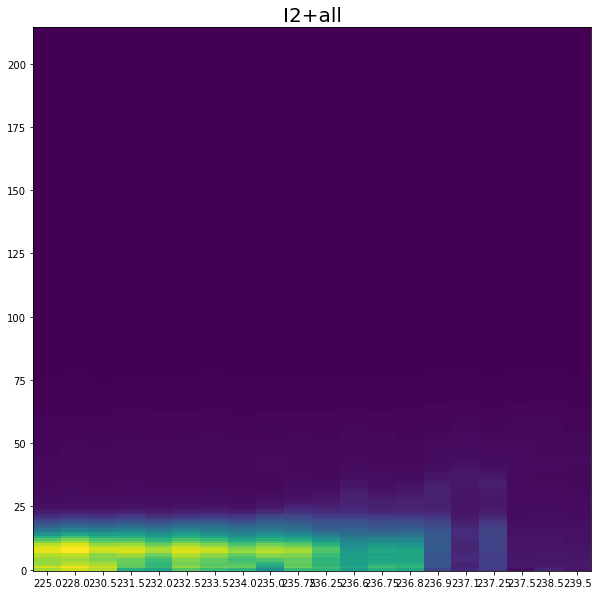

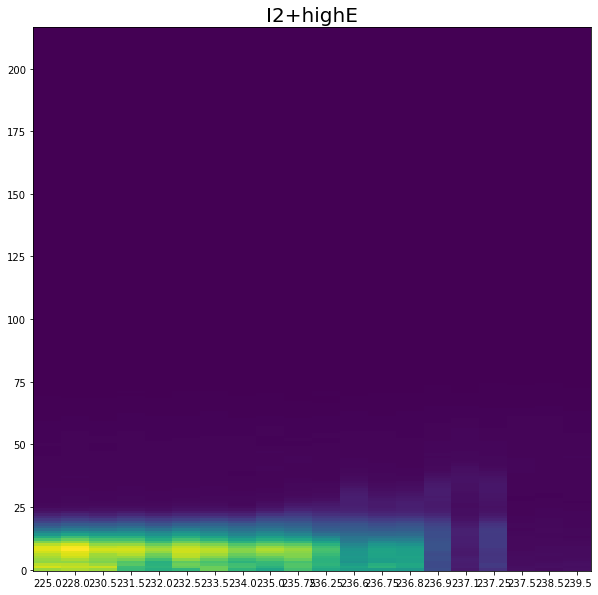

In [16]:
heatmap(fragment_list, uni_delay, uni_list_of_lists)

### x-axis projection of heatmap

In [ ]:
x_projection_heatmap(fragment_list, uni_delay, uni_list_of_lists)
